## **CNN with CIFAR-10 Data**

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt    
%matplotlib inline

In [2]:
np.set_printoptions(suppress=True)

In [3]:
print(tf.__version__)

2.8.0


In [4]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2022-03-11 23:55:57.843650: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-11 23:55:57.902850: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-11 23:55:57.903026: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
# Release GPU memory to prevent memory-leaks.

from numba import cuda
device = cuda.get_current_device()
device.reset()

In [7]:
!nvidia-smi

Fri Mar 11 23:55:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0 Off |                  N/A |
| N/A   48C    P0    23W /  N/A |      8MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 119s 1us/step


In [5]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  50000 images in the training dataset
There are  10000 images in the test dataset


In [6]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

In [7]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

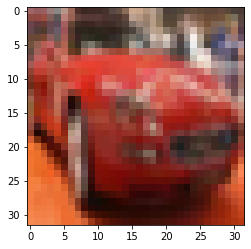

In [8]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

In [9]:
y_train[5]

array([1], dtype=uint8)

In [10]:
y_train.shape   #bir vektör hepsi birer scaler değer 

(50000, 1)

In [11]:
np.unique(y_train, return_counts=True) #unique fonksiyonu herbir sinden 5000 data var return_counts ile bunu görebiliyoruz 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
y_train[0] #bunu indexleyebiliyoruz önce bunu int formatına dönüştürüp classla eşleyebiliriz 

array([6], dtype=uint8)

In [15]:
classes[int(y_train[0])] #bu gibi 

'frog'

In [13]:
int(np.random.randint(low=0, high=50000, size=1)) #size 1 dedik random değer döndürüyor 

14487

In [18]:
X_train[int(np.random.randint(low=0, high=50000, size=1))] #rastgele 1 değer döndürüyor  

array([[[210, 215, 225],
        [222, 224, 236],
        [209, 215, 234],
        ...,
        [114, 140, 124],
        [152, 171, 158],
        [161, 173, 166]],

       [[198, 210, 226],
        [203, 212, 228],
        [195, 208, 229],
        ...,
        [100, 135, 116],
        [114, 141, 125],
        [ 98, 113, 104]],

       [[189, 205, 221],
        [172, 186, 200],
        [172, 190, 207],
        ...,
        [ 65,  98,  79],
        [ 70,  94,  79],
        [ 64,  78,  69]],

       ...,

       [[120, 127, 132],
        [119, 126, 130],
        [120, 127, 130],
        ...,
        [130, 135, 138],
        [130, 137, 141],
        [124, 129, 134]],

       [[123, 128, 132],
        [122, 126, 130],
        [122, 127, 131],
        ...,
        [126, 131, 134],
        [126, 131, 135],
        [124, 129, 133]],

       [[216, 220, 222],
        [213, 217, 219],
        [214, 218, 220],
        ...,
        [214, 218, 220],
        [213, 218, 220],
        [213, 217, 219]]

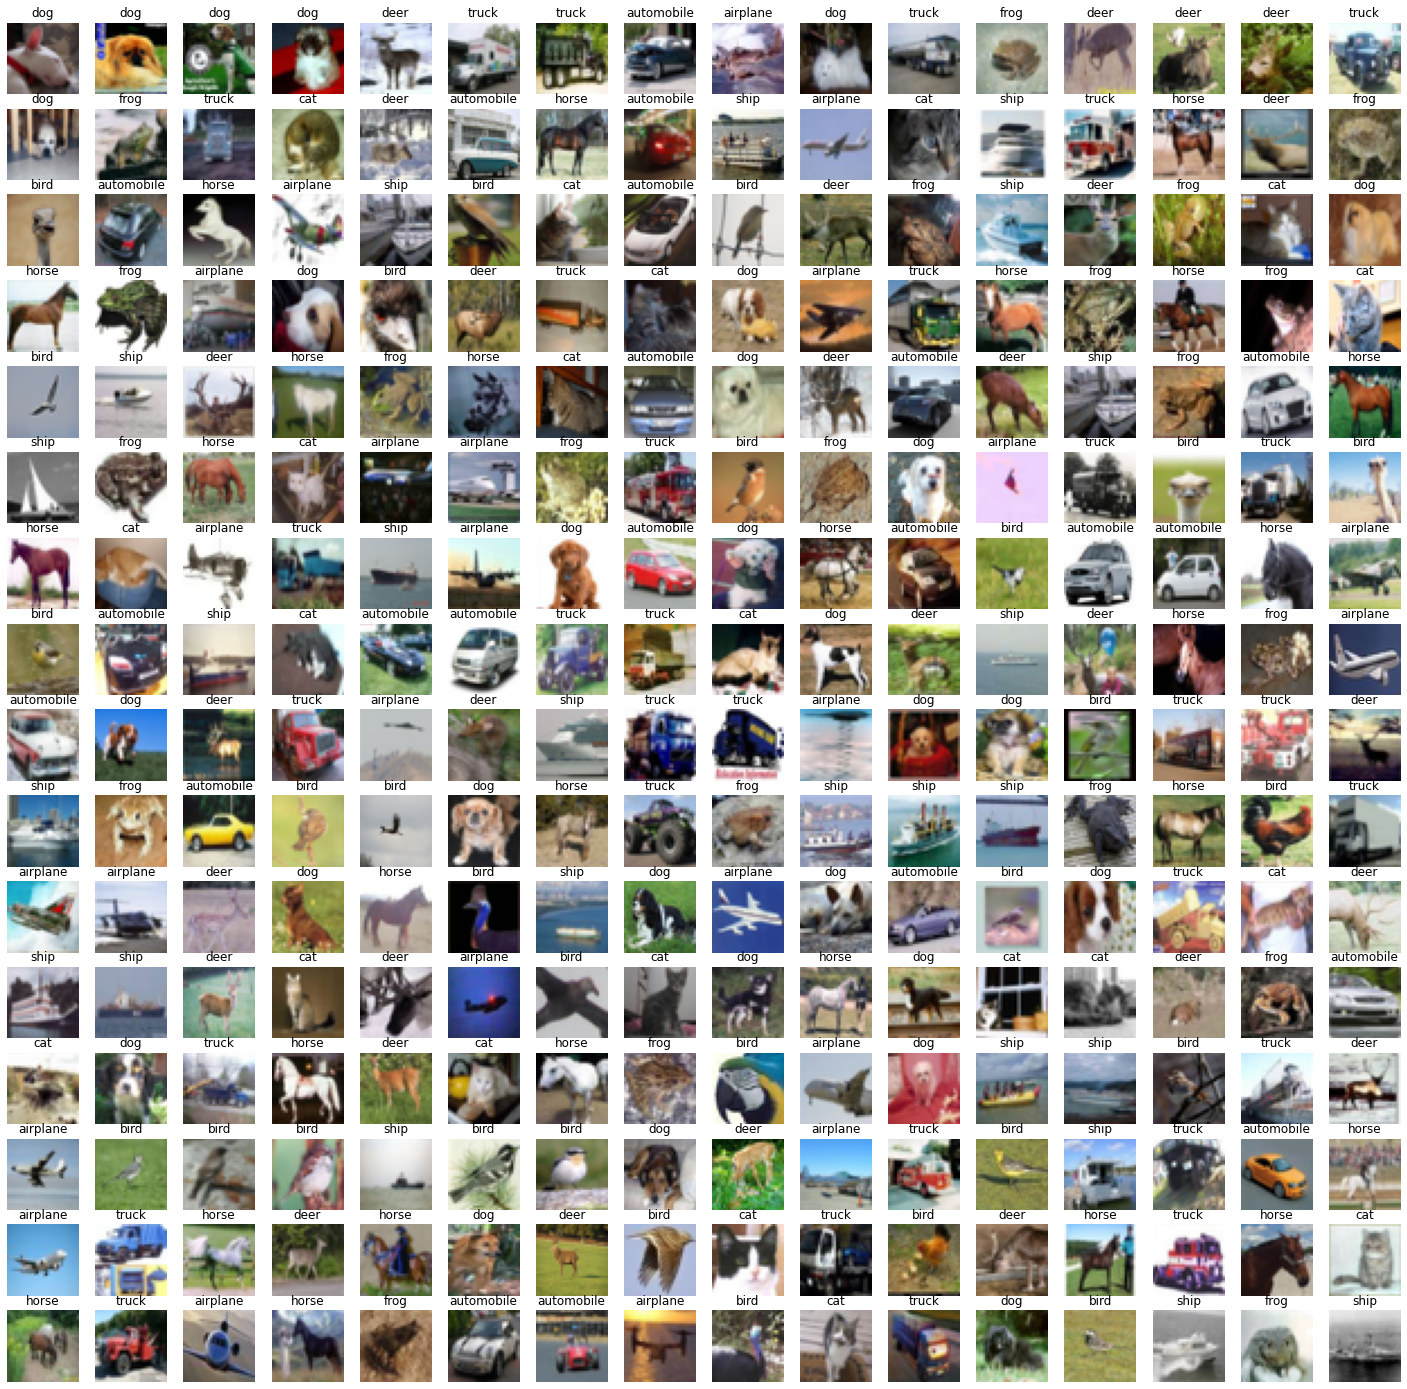

In [16]:
plt.figure(figsize=(25, 25)) #256 tane resim çizdirdik 
for i in range(256): #0 dan 256 ya kadar rastgele seçiyyum 
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(16, 16, i+1, label=classes[int(y_train[rand_index])]) #label vermişiz subplota 
    plt.axis('off')                                                                    
    plt.title(classes[int(y_train[rand_index])])              #o resmin classını alıyoruz ve resmin üzerine atıyoruz 
    plt.imshow(X_train[rand_index])    

## Data Preprocessing

In [17]:
X_train[5].min()

0

In [18]:
X_train[5].max()

252

In [19]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [20]:
X_train[5].min()

0.0

In [21]:
X_train[5].max()

0.9882353

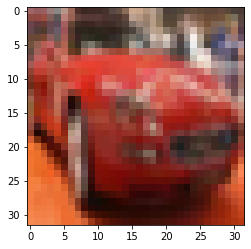

In [22]:
plt.imshow(X_train[5])

In [23]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [24]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

#### Dropout layer extra info

[External link to the keras documentation about dropout layers. An important read!](https://keras.io/api/layers/regularization_layers/dropout/)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [28]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu', padding='same'))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 450s 285ms/step - loss: 1.3760 - accuracy: 0.5004 - val_loss: 1.0230 - val_accuracy: 0.6390
Epoch 2/50
1563/1563 [==============================] - 497s 318ms/step - loss: 0.9377 - accuracy: 0.6680 - val_loss: 0.8923 - val_accuracy: 0.6891
Epoch 3/50
1563/1563 [==============================] - 523s 335ms/step - loss: 0.7831 - accuracy: 0.7240 - val_loss: 0.9087 - val_accuracy: 0.6796
Epoch 4/50
1563/1563 [==============================] - 613s 393ms/step - loss: 0.6813 - accuracy: 0.7596 - val_loss: 0.8115 - val_accuracy: 0.7224
Epoch 5/50
1173/1563 [=====================>........] - ETA: 2:01 - loss: 0.5887 - accuracy: 0.7916

In [36]:
model.metrics_names

['loss', 'accuracy']

In [37]:
model.history.history

{'loss': [1.3723323345184326,
  0.9457103610038757,
  0.789635419845581,
  0.6862335205078125,
  0.6032431125640869,
  0.5268482565879822,
  0.46640992164611816,
  0.40705424547195435,
  0.35872742533683777,
  0.3111843466758728],
 'accuracy': [0.5000600218772888,
  0.6671199798583984,
  0.7228999733924866,
  0.7598599791526794,
  0.7893800139427185,
  0.8147199749946594,
  0.8348600268363953,
  0.8563600182533264,
  0.8724200129508972,
  0.8897799849510193],
 'val_loss': [1.0851049423217773,
  0.8947256803512573,
  0.8251330256462097,
  0.8700646758079529,
  0.8210573196411133,
  0.8452633619308472,
  0.862372875213623,
  0.9038333892822266,
  0.9426745176315308,
  1.0390102863311768],
 'val_accuracy': [0.6105999946594238,
  0.6793000102043152,
  0.7035999894142151,
  0.7071999907493591,
  0.7200000286102295,
  0.7261999845504761,
  0.7254999876022339,
  0.718500018119812,
  0.730400025844574,
  0.7107999920845032]}

In [38]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.372332,0.50006,1.085105,0.6106
1,0.945710,0.66712,0.894726,0.6793
2,0.789635,0.72290,0.825133,0.7036
3,0.686234,0.75986,0.870065,0.7072
4,0.603243,0.78938,0.821057,0.7200


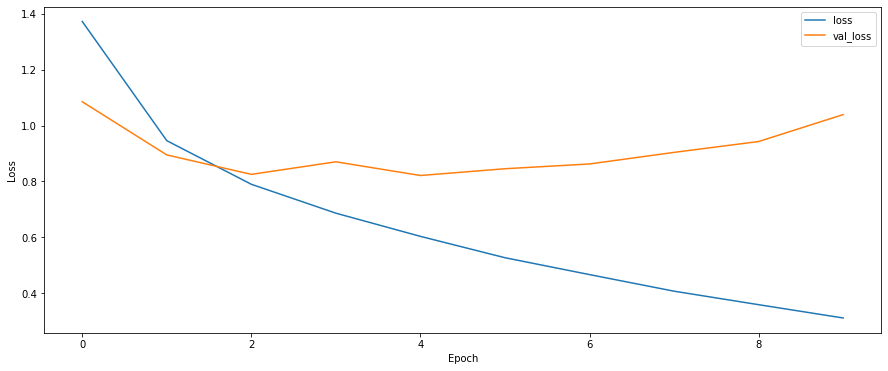

In [39]:
plt.figure(figsize=(15, 6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

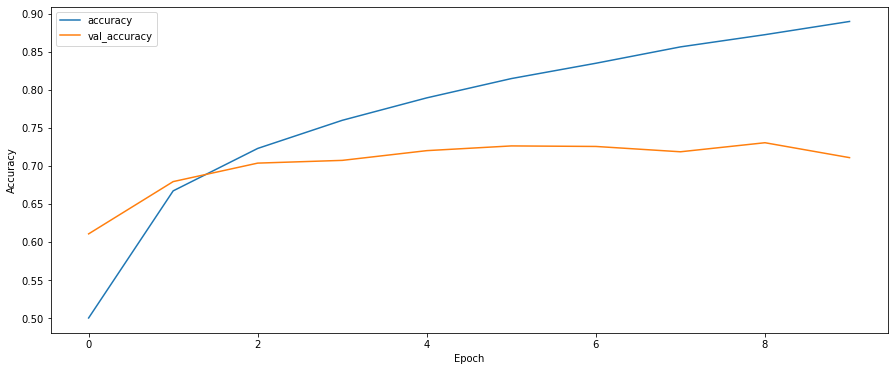

In [40]:
plt.figure(figsize=(15, 6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [41]:
print(model.evaluate(X_test, Y_test, verbose=1))

313/313 [==============================] - 1s 2ms/step - loss: 1.0390 - accuracy: 0.7108
[1.0390102863311768, 0.7107999920845032]


In [42]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [43]:
preds = model.predict(X_test)


In [44]:
predictions = np.argmax(preds, axis=1)

In [45]:
predictions

array([3, 8, 8, ..., 5, 5, 7])

In [46]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73      1000
           1       0.91      0.77      0.84      1000
           2       0.57      0.64      0.60      1000
           3       0.54      0.47      0.50      1000
           4       0.68      0.64      0.66      1000
           5       0.65      0.54      0.59      1000
           6       0.86      0.72      0.78      1000
           7       0.72      0.81      0.76      1000
           8       0.73      0.89      0.80      1000
           9       0.80      0.83      0.81      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [47]:
print(confusion_matrix(y_test, predictions))

[[803   6  40   8  12   6   3  10  91  21]
 [ 38 774   8   7   1   4   4   2  59 103]
 [100   2 635  57  58  34  35  36  30  13]
 [ 54   2 101 468  68 153  45  57  35  17]
 [ 30   5 109  34 643  34  18 102  18   7]
 [ 28   5  75 196  37 536  12  77  25   9]
 [ 16   4  73  52  72  26 719  11  15  12]
 [ 29   1  38  31  37  31   2 810  10  11]
 [ 50   7  18   4   4   1   1   6 892  17]
 [ 44  44  11   2   7   2   1  16  45 828]]


In [48]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0390102863311768
Test accuracy: 0.7107999920845032


In [49]:
my_image = X_test[44]

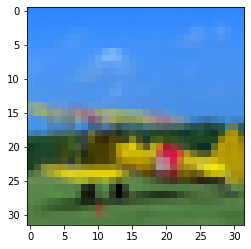

In [50]:
plt.imshow(my_image)

In [51]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

In [52]:
image_prediction

array([[0.99974114, 0.00001128, 0.000002  , 0.00000003, 0.00000015,
        0.00000001, 0.        , 0.        , 0.00001805, 0.00022739]],
      dtype=float32)

In [53]:
np.argmax(image_prediction, axis=1)

array([0])

In [54]:
result=np.argmax(image_prediction, axis=1)

In [55]:
result

array([0])

In [56]:
classes[int(result)]

'airplane'

In [57]:
#model.save("cnn-1.h5")

In [58]:
early_stop = EarlyStopping(monitor='val_loss', patience=15)

In [59]:
model= Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
        
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [61]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

2022-03-11 23:57:36.295225: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2022-03-11 23:57:36.640798: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/100
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3754 - accuracy: 0.5027 - val_loss: 1.0597 - val_accuracy: 0.6302
Epoch 2/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9934 - accuracy: 0.6475 - val_loss: 0.8900 - val_accuracy: 0.6925
Epoch 3/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8444 - accuracy: 0.7028 - val_loss: 0.7929 - val_accuracy: 0.7287
Epoch 4/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7504 - accuracy: 0.7338 - val_loss: 0.7519 - val_accuracy: 0.7389
Epoch 5/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6811 - accuracy: 0.7568 - val_loss: 0.7306 - val_accuracy: 0.7479
Epoch 6/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6134 - accuracy: 0.7817 - val_loss: 0.6996 - val_accuracy: 0.7600
Epoch 7/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5694 - accuracy: 0.7975 - val_loss: 0.7285 -

In [62]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8310430645942688
Test accuracy: 0.7698000073432922


In [63]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

In [64]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1000
           1       0.87      0.90      0.89      1000
           2       0.65      0.69      0.67      1000
           3       0.58      0.56      0.57      1000
           4       0.73      0.74      0.73      1000
           5       0.68      0.65      0.66      1000
           6       0.79      0.83      0.81      1000
           7       0.79      0.83      0.81      1000
           8       0.89      0.87      0.88      1000
           9       0.87      0.87      0.87      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



In [65]:
print(confusion_matrix(y_test, predictions))

[[778  14  66  23   9   5  12  19  47  27]
 [  7 898   3   9   2   3  11   2  14  51]
 [ 46   3 687  49  74  49  59  20   9   4]
 [ 15  11  80 557  66 148  50  53   9  11]
 [ 15   1  57  45 738  28  50  56   7   3]
 [  6   4  59 158  47 646  17  52   5   6]
 [  2   4  44  63  24  21 830   6   4   2]
 [ 12   2  36  26  43  38   5 828   5   5]
 [ 34  25  14  15   6   7   8   3 866  22]
 [ 13  65   8  15   3   2   4   8  12 870]]


<AxesSubplot:>

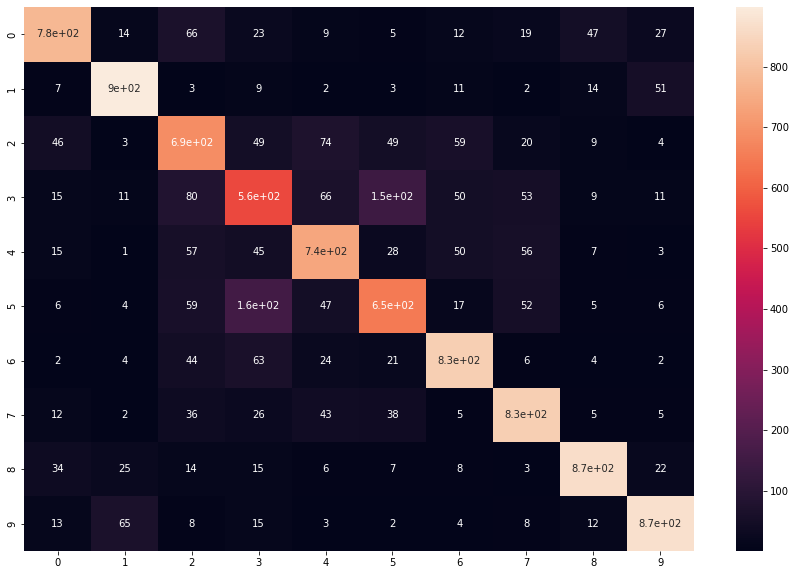

In [66]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [67]:
from tensorflow.keras.layers import BatchNormalization

In [73]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [71]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [72]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [74]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

2022-03-12 00:11:43.402142: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/100
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5087 - accuracy: 0.4816 - val_loss: 1.1558 - val_accuracy: 0.5857
Epoch 2/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9236 - accuracy: 0.6833 - val_loss: 0.8781 - val_accuracy: 0.6967
Epoch 3/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7248 - accuracy: 0.7572 - val_loss: 0.6810 - val_accuracy: 0.7720
Epoch 4/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6035 - accuracy: 0.7987 - val_loss: 0.6465 - val_accuracy: 0.7781
Epoch 5/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.4980 - accuracy: 0.8349 - val_loss: 0.5724 - val_accuracy: 0.8089
Epoch 6/100
1563/1563 [==============================] - 16s 10ms/step - loss: 0.4095 - accuracy: 0.8632 - val_loss: 0.5530 - val_accuracy: 0.8196
Epoch 7/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.3315 - accuracy: 0.8913 - val_loss: 0

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

In [ ]:
print(classification_report(y_test, predictions))